# 📘 Inicio del Notebook: Segmentación de Clientes

Este notebook explora diferentes técnicas de **clustering** para segmentar clientes del dataset **Mall_Customers**.  
El objetivo es comparar algoritmos y analizar cómo agrupan a los clientes en función de sus características.

---

## 🎯 Objetivos
- Aplicar métodos de clustering para segmentar clientes.
- Evaluar y comparar distintos enfoques (K-Means y Jerárquico).
- Visualizar los resultados para interpretar los grupos encontrados.

---

## 🚀 Metodología
1. **Carga y exploración de datos** → revisión inicial del dataset.  
2. **Preprocesamiento** → eliminación de columnas irrelevantes y preparación de variables.  
3. **Clustering con K-Means** → agrupamiento basado en centroides.  
4. **Clustering Jerárquico (Agglomerative)** → agrupamiento por fusiones sucesivas.  
5. **Comparación de métricas** → Silhouette, Calinski-Harabasz, Davies-Bouldin.  
6. **Visualización y conclusiones** → análisis de los clústeres obtenidos.

---

## 📊 Resultados esperados
- Identificar segmentos de clientes según edad, ingresos y score de gasto.  
- Comparar cómo difieren los grupos según el algoritmo utilizado.  
- Evaluar qué método resulta más adecuado para este dataset.


In [ ]:
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as hc
from sklearn.cluster import AgglomerativeClustering

In [4]:
data= pd.read_csv('https://raw.githubusercontent.com/palasatenea66/DATASETS/main/Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
print(data.shape)
data.columns

(200, 5)


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [15]:
df= data.iloc[:,[2, 3, 4]].values
df

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

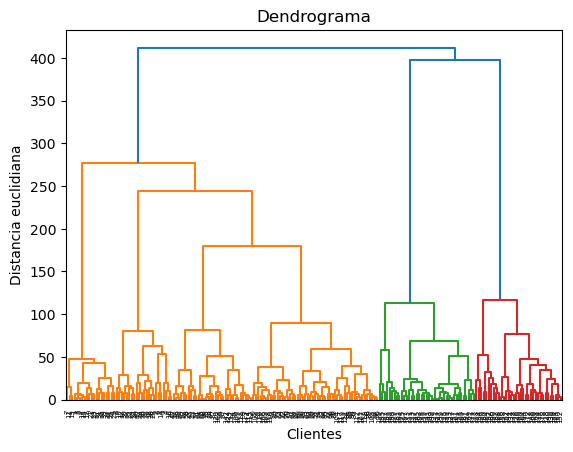

In [ ]:
# visualizar un dendrograma a partir de un clustering jerárquico
dendrog=hc.dendrogram(hc.linkage(df, method= 'ward'))

plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancia euclidiana')
plt.show()

Agrupaciones visibles

Podés ver tres grandes ramas principales que se unen recién arriba de los 350–400 en distancia → significa que hay tres grandes segmentos de clientes muy diferentes entre sí.

Dentro de esas ramas, aparecen subdivisiones más pequeñas (clusters internos), por ejemplo los que están unidos a alturas de 50–100. Esos representan subsegmentos de clientes similares.

Cómo decidir el número de clusters

La técnica habitual es cortar el dendrograma horizontalmente en un punto donde haya pocas uniones largas arriba.

En tu gráfico, si cortás más o menos a la altura de 150–200, vas a obtener aproximadamente 4 clusters principales.

Si cortás más abajo (altura 50–100), vas a tener muchos más clusters (quizás 6–8), pero más finos.

In [ ]:
# DIVIDIR EN 6 CLUSTERS
clust=AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
plo=clust.fit_predict(df)

In [9]:
plo

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 5,
       4, 5, 1, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5,
       1, 1, 1, 5, 1, 1, 1, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1,
       1, 5, 1, 5, 5, 5, 1, 1, 1, 1, 5, 1, 1, 2, 5, 2, 0, 2, 0, 2, 0, 2,
       5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [10]:
fig = px.scatter_3d(data_frame=data, x="Age", y="Annual Income (k$)", z= 'Spending Score (1-100)', width=1000, height=800, color=plo)
fig.show()


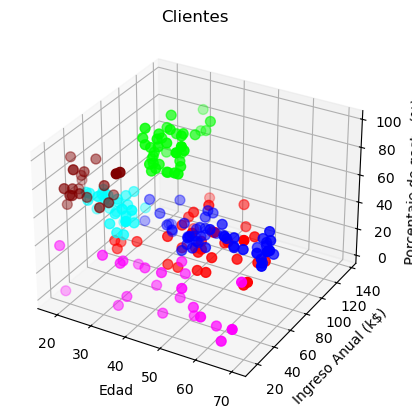

In [11]:
%matplotlib inline

ax = plt.axes(projection="3d")
ax.scatter3D(df[plo==0,0], df[plo==0, 1],df[plo==0, 2], s=50, c='red')
ax.scatter3D(df[plo==1,0], df[plo==1, 1],df[plo==1, 2], s=50, c='blue')
ax.scatter3D(df[plo==2,0], df[plo==2, 1],df[plo==2, 2], s=50, c='lime')
ax.scatter3D(df[plo==3,0], df[plo==3, 1],df[plo==3, 2], s=50, c='maroon')
ax.scatter3D(df[plo==4,0], df[plo==4, 1],df[plo==4, 2], s=50, c='magenta')
ax.scatter3D(df[plo==5,0], df[plo==5, 1],df[plo==5, 2], s=50, c='cyan')
plt.title('Clientes')
ax.set_xlabel('Edad')
ax.set_ylabel('Ingreso Anual (k$)')
ax.set_zlabel('Porcentaje de gasto (%)')
#ax.legend()
plt.show()

In [12]:
df = pd.DataFrame(df, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
df['labels']=plo
df

,Age,Annual Income (k$),Spending Score (1-100),labels
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4
...,...,...,...,...
195,35,120,79,2
196,45,126,28,0
197,32,126,74,2
198,32,137,18,0
